# ICS 485 : Machine Learning - Task3: Neural Networks

## Term Project: Software Bug Prediction

This is the neural networks section of the project.

**Team member:** Faris Hijazi s201578750


**Abstract:** Develop advanced machine learning-based classification models to
satisfactorily classify **software bugs** (binary and multiclass) for data collected at the
University of Geneva in Switzerland.



**Dataset:** The dataset is related to the bug prediction dataset. It contains data about the
following software systems:
- Eclipse JDT Core
- Eclipse PDE UI
- Equinox Framework
- Lucene
- Mylyn

For each system the dataset includes the following piece of information:

```
- CK and other 11 object oriented metrics for the last version of the system.
- Categorized (with bug infection) post-release defect counts.
```
The files are defined below:

1. Eclipse_ JDT_Core_single-version-ck-oo_bugs_only.csv
2. Eclipse_PDE_UI_single-version-ck-oo_bug_only.csv
3. Equinox_Framework_single-version-ck-oo_bug_only.csv
4. Lucene_single-version-ck-oo_bug_only.csv
5. Mylyn_single-version-ck-oo_bug_only.csv**

**Training/Validation/Testing Set:**
Divide the dataset into Training/Validation/Testing Set by randomly distributing 70%
for training, 15% for validation, and 15% for the test set.

**Task 1 :**
Provide **3 different binary classifiers** to predict the bug given the software metrics
considered. In case of more than one bug, you should treat the sample as infected with a
bug (class 1). Investigate the following issues:
a. Classifier optimization and hyper-parameter tuning.
b. The metrics to measure the classifier performance.
c. Make sure to run your models on the testing data.


**Task 2 :**
Provide **3 different multiclassifiers** to predict the bugs ( **0, 1, and 2** ) given the software
metrics considered. In case of more than one bug, you should treat the sample as infected
with more than 2 bugs be considered as class 2. Investigate the following issues:
a. Classifier optimization and hyper-parameter tuning.
b. The metrics to measure the classifier performance.
c. Make sure to run your models the testing data.

**Task 3 :**
Train a feedforward neural network to predict the bugs for the data provided. Determine
the optimal training parameters for your neural network that are sufficiently general to
predict the bugs on any withheld data that you will not have for testing purposes. You
will, therefore, need to devise and execute a plan that uses the given data for training and
testing in a manner that most closely mimics the real test (on withheld data) including:
a. Number of hidden layers
b. Hidden layer nodes
c. Training function
d. Learning function
e. Iterations (epochs)

**Required:**

1. Python notebooks for all the classifiers used.
2. Written report that should include:
    1) Objective
    2) Data analysis and preparation. Please provide some analysis of the data that
       demonstrates that you have compared the variable space for the different classes
       of bugs (e.g.: simple statistics, 3D cross plots, density functions, etc.).
       [Extra: consider evaluating dimension reduction and/or cluster analysis
       techniques.]
    3) Provide descriptive statistics on the predictors (i.e., features) as well as classes.
    4) Provide correlation analysis for features and target.
    5) Training and testing procedures for developing optimal classifiers, along with test
       results.
    6) Testing performance of the trained neural networks on the entire training set.
       [Extra: Some form of ensemble learning]
       [Extra: Based on the analysis and ML experiments and looking into the details of
       the features, provide some insights]
       **Note** : You can consult your instructor for clarifications and ideas.

In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt                        
%matplotlib inline

import utils, plot_utils, model_utils

from IPython.display import display, HTML

## Loading and preprocessing

In [2]:
data_dirs = [
    "data/Eclipse_ JDT_Core_single-version-ck-oo_bugs_only.csv",
    "data/Eclipse_PDE_UI_single-version-ck-oo_bug_only.csv",
    "data/Equinox_Framework_single-version-ck-oo_bug_only.csv",
    "data/Lucene_single-version-ck-oo_bug_only.csv",
    "data/Mylyn_single-version-ck-oo_bug_only.csv"
]

dfs = [pd.read_csv(data_dir, na_filter=True) for data_dir in data_dirs]

df = pd.concat(dfs, sort=False).reset_index().drop(['index'], axis=1)

df.rename(str.strip, inplace=True, axis='columns')
df.rename({'': 'Unnamed'}, inplace=True, axis='columns')

In [3]:
print('shape:', df.shape)
print()
print(df.isna().sum(axis=0))

df.describe()

shape: (5371, 24)

classname                         0
cbo                               0
dit                               0
fanIn                             0
fanOut                            0
lcom                              0
noc                               0
numberOfAttributes                0
numberOfAttributesInherited       0
numberOfLinesOfCode               0
numberOfMethods                   0
numberOfMethodsInherited          0
numberOfPrivateAttributes         0
numberOfPrivateMethods            0
numberOfPublicAttributes          0
numberOfPublicMethods             0
rfc                               0
wmc                               0
bugs                              0
Unnamed                           0
Unnamed: 19                    5371
Unnamed: 20                    5371
Unnamed: 21                    5371
Unnamed: 22                    5371
dtype: int64


,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,...,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,0.0,0.0,0.0,0.0
mean,9.650717,1.948985,4.077825,5.808229,131.440328,0.548687,5.648110,20.607522,119.126233,9.465649,...,1.515733,1.588903,6.271272,47.397133,28.291380,0.259914,NaN,NaN,NaN,NaN
std,15.430910,1.339559,12.763334,7.413065,1419.297581,2.320663,32.421878,75.447749,305.121926,13.519683,...,4.259624,30.836387,10.583760,100.978959,69.140371,0.880067,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,18.000000,3.000000,...,0.000000,0.000000,2.000000,8.000000,4.000000,0.000000,NaN,NaN,NaN,NaN
50%,6.000000,1.000000,1.000000,3.000000,15.000000,0.000000,2.000000,0.000000,47.000000,6.000000,...,0.000000,0.000000,4.000000,21.000000,11.000000,0.000000,NaN,NaN,NaN,NaN
75%,11.000000,2.000000,3.000000,8.000000,55.000000,0.000000,5.000000,2.000000,115.000000,11.000000,...,1.000000,0.000000,7.000000,51.000000,27.000000,0.000000,NaN,NaN,NaN,NaN
max,362.000000,9.000000,355.000000,93.000000,81003.000000,49.000000,2169.000000,563.000000,7509.000000,403.000000,...,111.000000,2168.000000,387.000000,2603.000000,1680.000000,28.000000,NaN,NaN,NaN,NaN


Dropping NaN columns

In [4]:
columns = df.columns
df.dropna(1, inplace=True)

dropped_columns = list(columns.drop(df.columns.intersection(columns)))

print(f'dropped {len(dropped_columns)} NaN columns: {dropped_columns}')

dropped 4 NaN columns: ['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 20 columns):
classname                      5371 non-null object
cbo                            5371 non-null int64
dit                            5371 non-null int64
fanIn                          5371 non-null int64
fanOut                         5371 non-null int64
lcom                           5371 non-null int64
noc                            5371 non-null int64
numberOfAttributes             5371 non-null int64
numberOfAttributesInherited    5371 non-null int64
numberOfLinesOfCode            5371 non-null int64
numberOfMethods                5371 non-null int64
numberOfMethodsInherited       5371 non-null int64
numberOfPrivateAttributes      5371 non-null int64
numberOfPrivateMethods         5371 non-null int64
numberOfPublicAttributes       5371 non-null int64
numberOfPublicMethods          5371 non-null int64
rfc                            5371 non-null int64
wmc                      

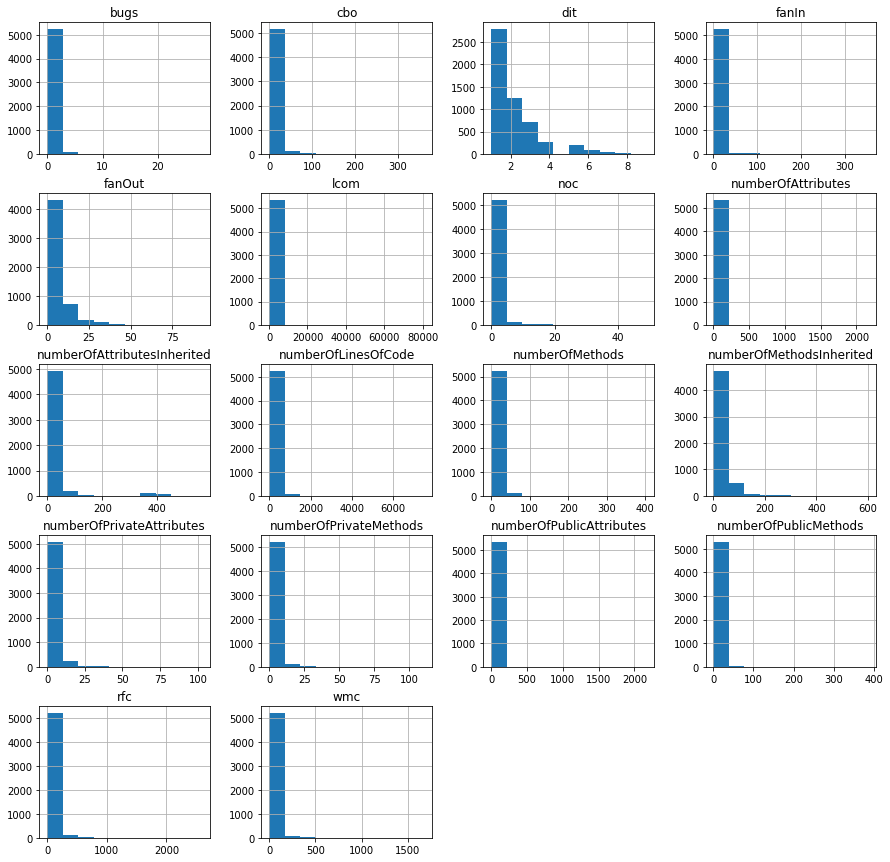

In [6]:
df.hist(figsize=(15, 15));

In [7]:
# axes = pd.plotting.scatter_matrix(df_big, figsize=(50, 50))

![scatter_matrix](assets/scatter_matrix_dropna.png)

In [8]:
## one-hot encoding

# df = pd.get_dummies(df, columns=['classname', 'Unnamed'])
# list(pd.get_dummies(df, columns=['classname', 'Unnamed']).columns)
df = df.drop(['classname', 'Unnamed'], axis='columns')

### Balancing the data

Since this dataset is skewd, it would be a good idea to add proportional weights to the targets so that the classes could get better results.

We will be using undersampling

## Formatting the data

I'm going to put all the data and models inside one big container `container`, since there is so many version of the data (binary, multiclass, reduced, undersampled, and many more combinations)
Putting the data as X and Y format, and preprocessing the target values for multi-class and binary-classification

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from copy import deepcopy
import pprint


model_suffixes = [
    '',
    
    ## binary classifiers
    'bc', # normal, no undersampling
    'weighted_bc',
    'usamp_bc',
    'usamp_reduced_bc',
    
    # lda
    'lda_bc', # normal, no undersampling
    'lda_weighted_bc',
    'lda_usamp_bc',
    
    ## multi-class classification
    'mc', # normal, no undersampling
    'weighted_mc',
    'usamp_mc',
    'usamp_reduced_mc',
    
    'lda_mc',
    'lda_weighted_mc',
    'lda_usamp_mc',
]

model_info_template = ({
    'data':None,
    'lda':None,
    'criterion':None,
    'optimizer':None,
    'hyperparams':{},
    'loader':None,
    'model':None,
    'scores':{},
})

models = {model_suffix: deepcopy(model_info_template) for model_suffix in model_suffixes }


print('structure of a single model:')
pprint.pprint(models['bc'])

structure of a single model:
{'criterion': None,
 'data': None,
 'hyperparams': {},
 'lda': None,
 'loader': None,
 'model': None,
 'optimizer': None}


### LinearDiscriminantAnalysis

Applying transforms on data

In [10]:
for key in models:
    keywords = key.split('_') # keywords: stuff like ["usamp", "mc", "bc", "reduced"]
    df_ = df.copy(True)

    ## setting limits to classes  # modifying labels
    if 'bc' in keywords:
        df_.loc[:,'bugs'][df_.loc[:,'bugs']!=0] = 1 # forcing classes of 0,1 only
    elif 'mc' in keywords:
        df_.loc[:,'bugs'][df_.loc[:,'bugs']>=2] = 2 # forcing classes of 0,1,2 only
    
    
    ###################
    ## understampling #
    ###################
    if 'usamp' in keywords:
        df_ = utils.undersample_df(df_, 'bugs')
    
    X_ = df_.drop(['bugs'], axis=1)
    Y_ = df_[['bugs']].values.squeeze()
    
    print(f'Y_{key} has {len(np.unique(Y_))} classes')
    
    
    ########
    ## LDA #
    ########
    
    # reduce dimensions
    n_components = 3 if 'reduced' in keywords else None
    lda = LDA(n_components=n_components).fit(X_.values, Y_)
    
    ## LDA transform
    if 'lda' in keywords or 'reduced' in keywords:
        X_ = pd.DataFrame(lda.transform(X_.values))
        
    models[key]['lda'] = lda

    # Choose percentage of train/val/test splits (0.7 means 70%)
    data_ = utils.get_train_val_test_split(X_, Y_, TRAIN_PERC=0.7, VAL_PERC=0.15, TEST_PERC=0.15)

    models[key]['data'] = data_

Y_ has 14 classes
Y_bc has 2 classes
Y_weighted_bc has 2 classes
Y_usamp_bc has 2 classes
Y_usamp_reduced_bc has 2 classes


C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Y_lda_bc has 2 classes
Y_lda_weighted_bc has 2 classes
Y_lda_usamp_bc has 2 classes
Y_mc has 3 classes
Y_weighted_mc has 3 classes
Y_usamp_mc has 3 classes
Y_usamp_reduced_mc has 3 classes


C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(17, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Y_lda_mc has 3 classes
Y_lda_weighted_mc has 3 classes
Y_lda_usamp_mc has 3 classes


In [11]:
# pd.plotting.scatter_matrix(df_usamp_mc, figsize=(15,15));

![scattermatrix](assets/df_usamp_mc-scattermatrix.png)

### Get train, val, test splits

In [12]:
# access by using data.trainx, data.testx, ...
print('train samples:\t', len(models['']['data'].trainx))
print('val samples:\t',   len(models['']['data'].valx))
print('test samples:\t',  len(models['']['data'].testx))
lda = models['']['lda']
del models['']

train samples:	 3759
val samples:	 805
test samples:	 805


In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider


def get_minimum_components_while_maintaining_varience(maintain_varience=95):
    min_components = len(lda.explained_variance_ratio_)
    for i in range(len(lda.explained_variance_ratio_)):
        if np.sum(lda.explained_variance_ratio_[0:i]) >= (maintain_varience/100.0):
            min_components = i+1
            break
    print(f'n_components while maintaining {maintain_varience}% = {min_components}')
    return min_components


def plot_varience(maintain_varience=95):
    min_varience_components = get_minimum_components_while_maintaining_varience(maintain_varience)-1
    
    points = [None] * len(lda.explained_variance_ratio_)
    points[min_varience_components] = lda.explained_variance_ratio_[min_varience_components]
    
#     print(f'maintaining top {min_varience_components}: ', X.columns[np.argsort(lda.coef_)[:-min_varience_components]])
    
    plt.plot(lda.explained_variance_ratio_)
    plt.plot(points, 'x')
    plt.title('explained_variance_ratio')
    plt.show()

    
interact(get_minimum_components_while_maintaining_varience, maintain_varience=IntSlider(value=95, min=0, max=100))

interact_manual(plot_varience, maintain_varience=IntSlider(value=95, min=0, max=100))

interactive(children=(IntSlider(value=95, description='maintain_varience'), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=95, description='maintain_varience'), Button(description='Run Interact',…

<function __main__.plot_varience(maintain_varience=95)>

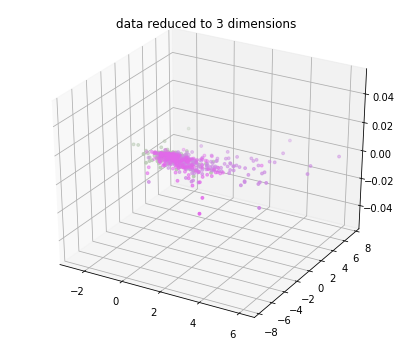

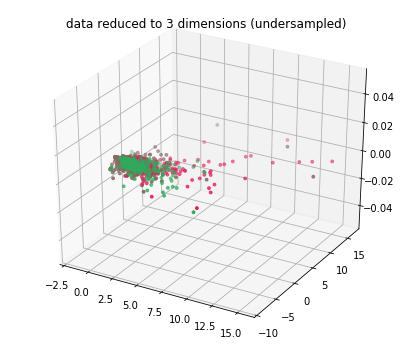

In [14]:
plot_utils.plot_labeled_data(models['lda_usamp_mc']['data'].X,
                  models['lda_usamp_mc']['data'].Y,
                  title='data reduced to 3 dimensions');

plot_utils.plot_labeled_data(models['lda_mc']['data'].X,
                  models['lda_mc']['data'].Y,
                  title='data reduced to 3 dimensions (undersampled)');

Plotting scatter matrices for scaled vs unscaled LDA data

In [15]:
# print('X_lda (unscaled)')
# pd.plotting.scatter_matrix(X_lda, figsize=(15, 15));

In [16]:
# print('X_lda_scaled')
# pd.plotting.scatter_matrix(X_lda_scaled, figsize=(15, 15));


unscaled | scaled | undersampled (mc)
:-: | :-: | :-:
![X_lda_unscaled.png](assets/X_lda_unscaled.png) | ![X_lda_scaled.png](assets/X_lda_scaled.png) | ![df_usamp_mc-scattermatrix](assets/df_usamp_mc-scattermatrix.png)

Not a huge difference after scaling, perhapse the LDA "effectively" has some type of "scaling" effect

## Neural Network Time
<img src="https://i.kym-cdn.com/photos/images/newsfeed/001/513/012/625.jpg" width="200px">

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [25]:
# # check if CUDA is available
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device='cpu'
# if device == 'cuda':
#     print('GPU FOUND, noice!!!!', device)
# else:
#     print('using CPU :(')


### Build DataLoaders

In [26]:
for key in models:
    keywords = key.split('_') # keywords: stuff like ["usamp", "mc", "bc", "reduced"]

    dtype = torch.FloatTensor if ('bc' in keywords) else torch.LongTensor
    
    models[key]['loader'] = utils.build_loaders(models[key]['data'], batch_size=64, dtype=dtype)

### Build Models

In [27]:
class ModelMC(nn.Module):
    def __init__(self, input_size, n_classes, drop_prob=0.2):
        super(ModelMC, self).__init__()
        self.input_size = input_size
        self.n_classes = n_classes
        
        self.dropout = nn.Dropout(drop_prob)
        
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, n_classes)
    
    def forward(self, x):
        batch_size = x.size(0)
        
        # fully connected layer 2
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # fully connected layer 2
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # fully connected layer 3
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # fully connected layer 4
        x = self.fc4(x)
        
        if self.n_classes == 1: # special case optimization
            # adding another column that contains the inverted probablities
            # this acts like the neural network has 2 output neurons,
            # but it doesn't have as many weights to train (optimization :D)
            x = add_inverted_binary_dimension(x)
            x = F.softmax(x, dim=1)
        else:
            x = F.softmax(x, dim=1)
        
        return x

def add_inverted_binary_dimension(x):
    return torch.cat((x, 1.0-x), dim=1)

In [28]:
# defining models
for key in models:
    keywords = key.split('_') # keywords: stuff like ["usamp", "mc", "bc", "reduced"]

    n_classes = 1 if ('bc' in keywords) else len(np.unique(models[key]['data'].Y))
    input_size = models[key]['data'].trainx.shape[1]
    
    # define model
    models[key]['model'] = ModelMC(input_size, n_classes=n_classes)
    
    
    ## weighted loss function
    # these label weights will help in balancing the dataset when training (gives higher weights to more rare samples)
    weights = None if 'weighted' not in keywords else \
              torch.from_numpy(utils.get_class_weights(models[key]['data'].trainy)).float().to(device)
    
    # define loss function
    models[key]['criterion'] = nn.CrossEntropyLoss(weight=weights)
    
    lr = 0.01
#     if 'reduced' in keywords:
#         lr *= 0.5
    
    # define optimizer
    models[key]['optimizer'] = optim.SGD(models[key]['model'].parameters(), lr=lr)


In [29]:
def train(epochs, model_code, **kwargs):
    print(f'\nTraining model: {model_code}\n')
    model_info = models[model_code]
    stats = model_info['stats'] if 'stats' in model_info else {}
    
    model_info['stats'] =  model_utils.train(
        epochs,
        model_info['loader'],
        model_info['model'],
        model_info['optimizer'],
        model_info['criterion'], 
        'model_'+model_code,
        mc=True,
        device=device,
        stats=stats,
        **kwargs
    )
    
    return model_info['stats']


Training model: bc

Estimated time needed:	05m:00033s.	Come back at around:	15/12/2019 19:50
Epoch:(50/1000) 00.28s (4.7%) 	Loss: 0.468869 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(100/1000) 00.28s (9.9%) 	Loss: 0.468469 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(150/1000) 00.28s (15.1%) 	Loss: 0.468406 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(200/1000) 00.22s (24.0%) 	Loss: 0.468347 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(250/1000) 00.27s (25.3%) 	Loss: 0.468312 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(300/1000) 00.28s (29.4%) 	Loss: 0.468231 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(350/1000) 00.28s (34.6%) 	Loss: 0.468233 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(400/1000) 00.27s (40.2%) 	Loss: 0.468248 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(450/1000) 00.27s (45.1%) 	Loss: 0.468252 	VLoss: 0.471	 accuracy: 84.22%
Epoch:(500/1000) 00.27s (50.6%) 	Loss: 0.468274 	VLoss: 0.470	 accuracy: 84.22%
Epoch:(550/1000) 00.29s (54.4%) 	Loss: 0.468207 	VLoss: 0.470	 accuracy: 84.22%
Epoch:(600/1000) 00.26s (63.2

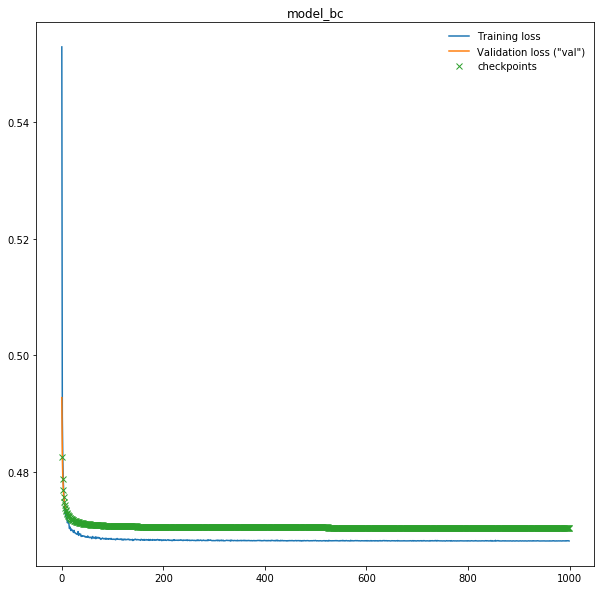


Training model: weighted_bc

Estimated time needed:	04m:00044s.	Come back at around:	15/12/2019 19:54
Epoch:(50/1000) 00.30s (4.7%) 	Loss: 0.609389 	VLoss: 0.638	 accuracy: 76.65%
Epoch:(100/1000) 00.24s (11.9%) 	Loss: 0.602372 	VLoss: 0.625	 accuracy: 78.14%
Epoch:(150/1000) 00.23s (17.1%) 	Loss: 0.600764 	VLoss: 0.620	 accuracy: 75.53%
Epoch:(200/1000) 00.21s (22.8%) 	Loss: 0.596504 	VLoss: 0.617	 accuracy: 74.16%
Epoch:(250/1000) 00.25s (25.4%) 	Loss: 0.596733 	VLoss: 0.624	 accuracy: 75.53%
Epoch:(300/1000) 00.26s (29.4%) 	Loss: 0.583283 	VLoss: 0.615	 accuracy: 76.27%
Epoch:(350/1000) 00.27s (32.8%) 	Loss: 0.593553 	VLoss: 0.613	 accuracy: 74.41%
Epoch:(400/1000) 00.25s (40.1%) 	Loss: 0.586149 	VLoss: 0.613	 accuracy: 75.03%
Epoch:(450/1000) 00.26s (42.7%) 	Loss: 0.588283 	VLoss: 0.620	 accuracy: 75.65%
Epoch:(500/1000) 00.28s (48.4%) 	Loss: 0.581382 	VLoss: 0.615	 accuracy: 74.53%
Epoch:(550/1000) 00.27s (53.6%) 	Loss: 0.580447 	VLoss: 0.612	 accuracy: 75.78%
Epoch:(600/1000) 00

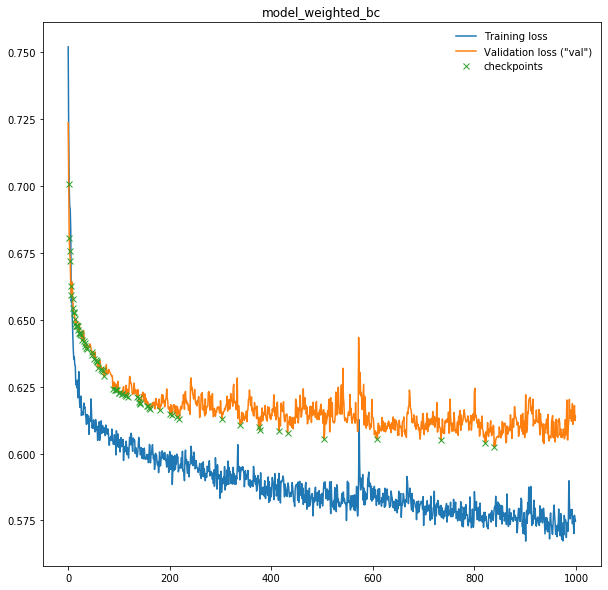


Training model: usamp_bc

Estimated time needed:	01m:00015s.	Come back at around:	15/12/2019 19:55
Epoch:(50/1000) 00.07s (5.3%) 	Loss: 0.623050 	VLoss: 0.607	 accuracy: 71.37%
Epoch:(100/1000) 00.08s (9.2%) 	Loss: 0.608959 	VLoss: 0.586	 accuracy: 72.94%
Epoch:(150/1000) 00.07s (15.7%) 	Loss: 0.599245 	VLoss: 0.579	 accuracy: 74.51%
Epoch:(200/1000) 00.07s (21.1%) 	Loss: 0.594697 	VLoss: 0.572	 accuracy: 72.94%
Epoch:(250/1000) 00.07s (27.4%) 	Loss: 0.593587 	VLoss: 0.569	 accuracy: 73.33%
Epoch:(300/1000) 00.06s (33.1%) 	Loss: 0.588632 	VLoss: 0.568	 accuracy: 74.90%
Epoch:(350/1000) 00.07s (35.5%) 	Loss: 0.588789 	VLoss: 0.565	 accuracy: 73.73%
Epoch:(400/1000) 00.07s (43.3%) 	Loss: 0.578445 	VLoss: 0.568	 accuracy: 73.73%
Epoch:(450/1000) 00.07s (47.3%) 	Loss: 0.582949 	VLoss: 0.568	 accuracy: 73.73%
Epoch:(500/1000) 00.08s (52.3%) 	Loss: 0.578605 	VLoss: 0.561	 accuracy: 75.29%
Epoch:(550/1000) 00.06s (58.7%) 	Loss: 0.576105 	VLoss: 0.563	 accuracy: 74.12%
Epoch:(600/1000) 00.07s

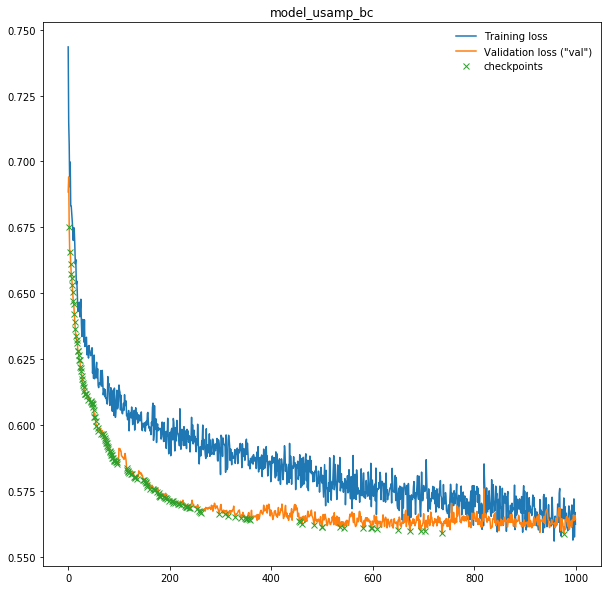


Training model: usamp_reduced_bc

Estimated time needed:	01m:00011s.	Come back at around:	15/12/2019 19:56
Epoch:(50/1000) 00.07s (5.6%) 	Loss: 0.636211 	VLoss: 0.613	 accuracy: 70.59%
Epoch:(100/1000) 00.07s (10.7%) 	Loss: 0.627721 	VLoss: 0.593	 accuracy: 71.37%
Epoch:(150/1000) 00.07s (16.1%) 	Loss: 0.614573 	VLoss: 0.590	 accuracy: 69.80%
Epoch:(200/1000) 00.08s (20.4%) 	Loss: 0.618729 	VLoss: 0.590	 accuracy: 69.80%
Epoch:(250/1000) 00.08s (26.4%) 	Loss: 0.620391 	VLoss: 0.589	 accuracy: 69.80%
Epoch:(300/1000) 00.07s (30.5%) 	Loss: 0.613159 	VLoss: 0.590	 accuracy: 70.59%
Epoch:(350/1000) 00.08s (35.8%) 	Loss: 0.611477 	VLoss: 0.590	 accuracy: 70.59%
Epoch:(400/1000) 00.08s (41.4%) 	Loss: 0.612942 	VLoss: 0.590	 accuracy: 70.59%
Epoch:(450/1000) 00.07s (44.1%) 	Loss: 0.612010 	VLoss: 0.590	 accuracy: 70.20%
Epoch:(500/1000) 00.07s (50.8%) 	Loss: 0.615266 	VLoss: 0.590	 accuracy: 70.59%
Epoch:(550/1000) 00.08s (56.9%) 	Loss: 0.613441 	VLoss: 0.590	 accuracy: 69.80%
Epoch:(600/100

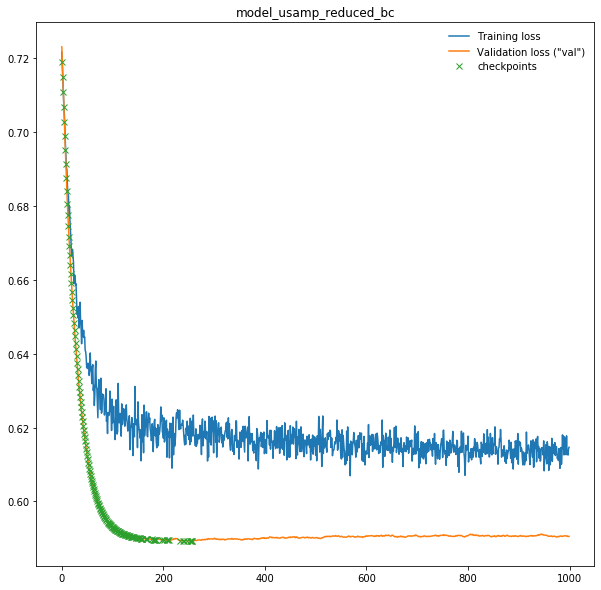


Training model: lda_bc

Estimated time needed:	03m:00048s.	Come back at around:	15/12/2019 20:00
Epoch:(50/1000) 00.22s (4.9%) 	Loss: 0.467758 	VLoss: 0.470	 accuracy: 84.22%
Epoch:(100/1000) 00.23s (9.7%) 	Loss: 0.450575 	VLoss: 0.458	 accuracy: 84.72%
Epoch:(150/1000) 00.24s (14.9%) 	Loss: 0.449075 	VLoss: 0.459	 accuracy: 84.84%
Epoch:(200/1000) 00.23s (20.0%) 	Loss: 0.449574 	VLoss: 0.459	 accuracy: 84.84%
Epoch:(250/1000) 00.23s (24.9%) 	Loss: 0.449142 	VLoss: 0.459	 accuracy: 84.72%
Epoch:(300/1000) 00.23s (30.2%) 	Loss: 0.448457 	VLoss: 0.459	 accuracy: 84.84%
Epoch:(350/1000) 00.24s (35.2%) 	Loss: 0.448643 	VLoss: 0.459	 accuracy: 84.84%
Epoch:(400/1000) 00.22s (40.9%) 	Loss: 0.448889 	VLoss: 0.458	 accuracy: 84.84%
Epoch:(450/1000) 00.23s (46.3%) 	Loss: 0.449925 	VLoss: 0.458	 accuracy: 84.84%
Epoch:(500/1000) 00.21s (51.2%) 	Loss: 0.448836 	VLoss: 0.458	 accuracy: 84.84%
Epoch:(550/1000) 00.23s (49.5%) 	Loss: 0.449163 	VLoss: 0.458	 accuracy: 84.72%
Epoch:(600/1000) 00.24s (

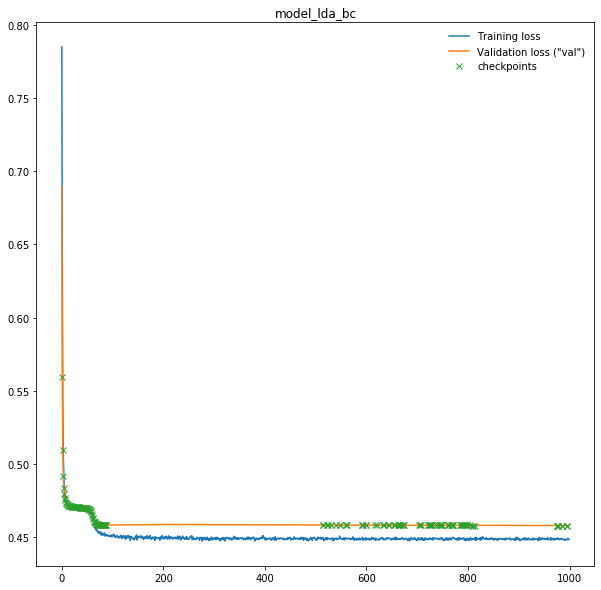


Training model: lda_weighted_bc

Estimated time needed:	03m:00041s.	Come back at around:	15/12/2019 20:04
Epoch:(50/1000) 00.24s (4.9%) 	Loss: 0.607665 	VLoss: 0.620	 accuracy: 76.15%
Epoch:(100/1000) 00.22s (9.8%) 	Loss: 0.606138 	VLoss: 0.619	 accuracy: 75.78%
Epoch:(150/1000) 00.24s (15.4%) 	Loss: 0.604539 	VLoss: 0.617	 accuracy: 75.40%
Epoch:(200/1000) 00.23s (20.2%) 	Loss: 0.605163 	VLoss: 0.616	 accuracy: 75.53%
Epoch:(250/1000) 00.22s (25.7%) 	Loss: 0.603004 	VLoss: 0.615	 accuracy: 75.53%
Epoch:(300/1000) 00.23s (30.5%) 	Loss: 0.604602 	VLoss: 0.615	 accuracy: 75.90%
Epoch:(350/1000) 00.22s (36.3%) 	Loss: 0.600895 	VLoss: 0.614	 accuracy: 75.53%
Epoch:(400/1000) 00.21s (41.9%) 	Loss: 0.603528 	VLoss: 0.614	 accuracy: 75.78%
Epoch:(450/1000) 00.25s (46.7%) 	Loss: 0.603772 	VLoss: 0.613	 accuracy: 75.90%
Epoch:(500/1000) 00.23s (51.4%) 	Loss: 0.600957 	VLoss: 0.613	 accuracy: 75.90%
Epoch:(550/1000) 00.24s (55.3%) 	Loss: 0.602558 	VLoss: 0.613	 accuracy: 75.90%
Epoch:(600/1000)

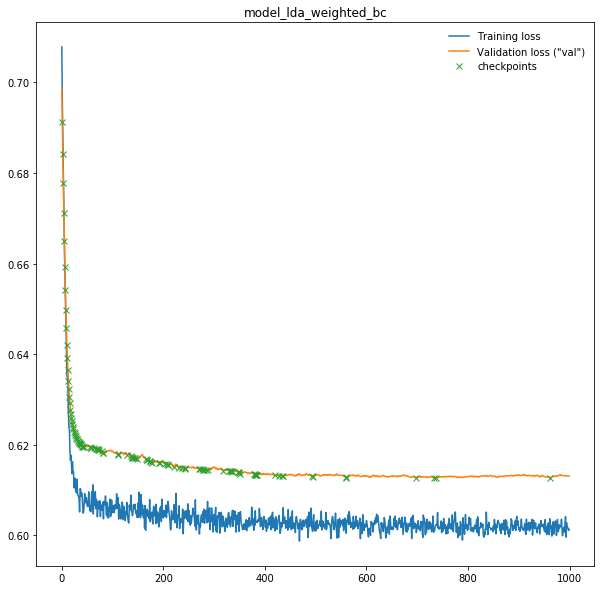


Training model: lda_usamp_bc

Estimated time needed:	01m:00015s.	Come back at around:	15/12/2019 20:06
Epoch:(50/1000) 00.07s (5.5%) 	Loss: 0.617834 	VLoss: 0.582	 accuracy: 73.33%
Epoch:(100/1000) 00.07s (10.5%) 	Loss: 0.612133 	VLoss: 0.572	 accuracy: 73.33%
Epoch:(150/1000) 00.06s (17.6%) 	Loss: 0.609124 	VLoss: 0.571	 accuracy: 73.33%
Epoch:(200/1000) 00.07s (21.1%) 	Loss: 0.603384 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(250/1000) 00.08s (26.1%) 	Loss: 0.602867 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(300/1000) 00.08s (29.7%) 	Loss: 0.611229 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(350/1000) 00.07s (36.3%) 	Loss: 0.607847 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(400/1000) 00.06s (42.3%) 	Loss: 0.606316 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(450/1000) 00.06s (47.0%) 	Loss: 0.604091 	VLoss: 0.570	 accuracy: 72.94%
Epoch:(500/1000) 00.07s (52.7%) 	Loss: 0.603184 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(550/1000) 00.07s (56.5%) 	Loss: 0.603774 	VLoss: 0.570	 accuracy: 73.33%
Epoch:(600/1000) 0

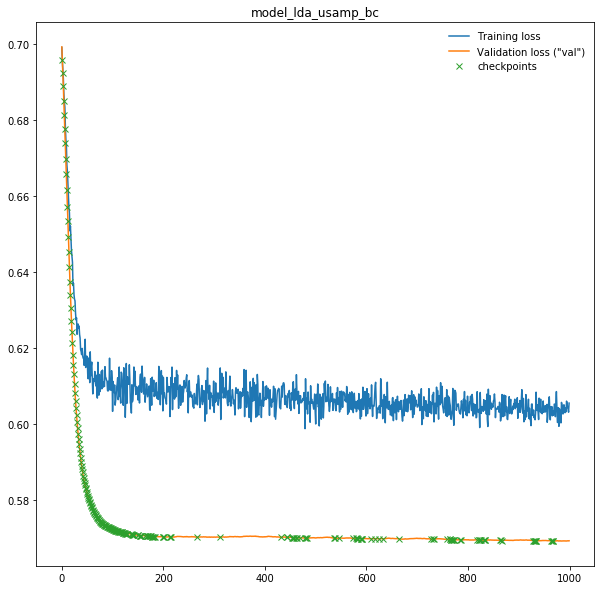


Training model: mc

Estimated time needed:	03m:00052s.	Come back at around:	15/12/2019 20:09
Epoch:(50/1000) 00.23s (5.2%) 	Loss: 0.707343 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(100/1000) 00.19s (10.4%) 	Loss: 0.706903 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(150/1000) 00.23s (14.4%) 	Loss: 0.706544 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(200/1000) 00.24s (20.7%) 	Loss: 0.706462 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(250/1000) 00.22s (25.8%) 	Loss: 0.706503 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(300/1000) 00.23s (29.7%) 	Loss: 0.706486 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(350/1000) 00.22s (34.8%) 	Loss: 0.706452 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(400/1000) 00.23s (40.2%) 	Loss: 0.706438 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(450/1000) 00.23s (45.8%) 	Loss: 0.706475 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(500/1000) 00.20s (51.8%) 	Loss: 0.706393 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(550/1000) 00.24s (54.6%) 	Loss: 0.706487 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(600/1000) 00.23s (61.

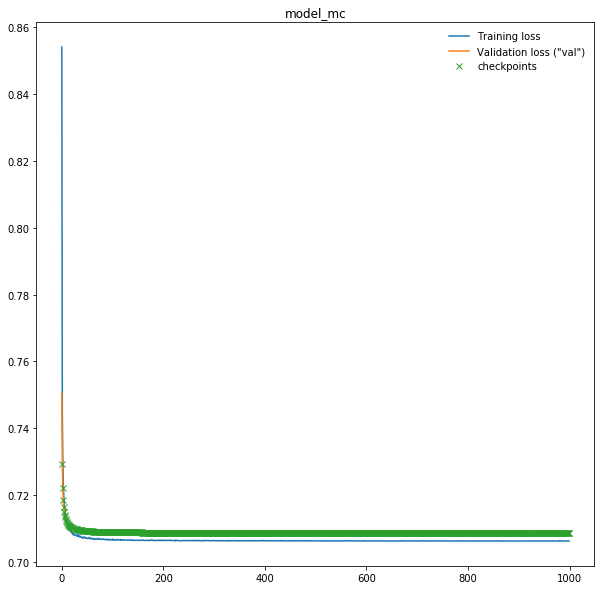


Training model: weighted_mc

Estimated time needed:	03m:00044s.	Come back at around:	15/12/2019 20:13
Epoch:(50/1000) 00.20s (5.2%) 	Loss: 0.995929 	VLoss: 1.049	 accuracy: 42.98%
Epoch:(100/1000) 00.20s (10.4%) 	Loss: 0.983896 	VLoss: 1.047	 accuracy: 51.30%
Epoch:(150/1000) 00.22s (14.5%) 	Loss: 0.973439 	VLoss: 1.045	 accuracy: 60.25%
Epoch:(200/1000) 00.23s (19.3%) 	Loss: 0.970031 	VLoss: 1.044	 accuracy: 62.11%
Epoch:(250/1000) 00.23s (24.1%) 	Loss: 0.964892 	VLoss: 1.039	 accuracy: 64.10%
Epoch:(300/1000) 00.22s (29.7%) 	Loss: 0.960237 	VLoss: 1.048	 accuracy: 67.70%
Epoch:(350/1000) 00.24s (34.2%) 	Loss: 0.965849 	VLoss: 1.043	 accuracy: 65.09%
Epoch:(400/1000) 00.23s (39.3%) 	Loss: 0.972712 	VLoss: 1.045	 accuracy: 60.99%
Epoch:(450/1000) 00.21s (45.1%) 	Loss: 0.961756 	VLoss: 1.039	 accuracy: 66.96%
Epoch:(500/1000) 00.22s (48.8%) 	Loss: 0.952761 	VLoss: 1.036	 accuracy: 64.60%
Epoch:(550/1000) 00.24s (53.9%) 	Loss: 0.956193 	VLoss: 1.041	 accuracy: 64.22%
Epoch:(600/1000) 00

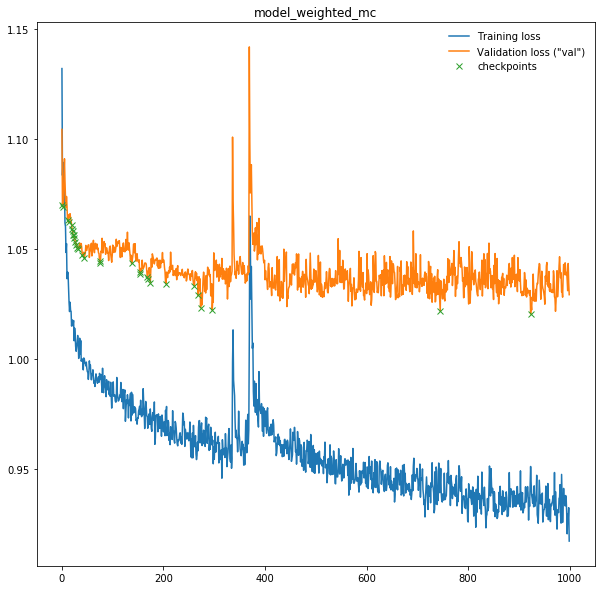


Training model: usamp_mc

Estimated time needed:	31.97s.	Come back at around:	15/12/2019 20:14
Epoch:(50/1000) 00.04s (5.3%) 	Loss: 1.050256 	VLoss: 1.045	 accuracy: 33.33%
Epoch:(100/1000) 00.03s (11.0%) 	Loss: 1.027334 	VLoss: 1.034	 accuracy: 28.95%
Epoch:(150/1000) 00.03s (15.7%) 	Loss: 1.020137 	VLoss: 1.029	 accuracy: 43.86%
Epoch:(200/1000) 00.03s (21.6%) 	Loss: 1.010694 	VLoss: 1.023	 accuracy: 42.11%
Epoch:(250/1000) 00.03s (27.1%) 	Loss: 0.995266 	VLoss: 1.023	 accuracy: 42.11%
Epoch:(300/1000) 00.03s (32.5%) 	Loss: 0.998301 	VLoss: 1.021	 accuracy: 43.86%
Epoch:(350/1000) 00.04s (36.1%) 	Loss: 0.985422 	VLoss: 1.018	 accuracy: 43.86%
Epoch:(400/1000) 00.04s (42.7%) 	Loss: 0.986108 	VLoss: 1.020	 accuracy: 42.11%
Epoch:(450/1000) 00.04s (46.7%) 	Loss: 0.984855 	VLoss: 1.015	 accuracy: 41.23%
Epoch:(500/1000) 00.04s (52.7%) 	Loss: 0.977387 	VLoss: 1.017	 accuracy: 42.11%
Epoch:(550/1000) 00.03s (60.0%) 	Loss: 0.977956 	VLoss: 1.012	 accuracy: 42.11%
Epoch:(600/1000) 00.03s (6

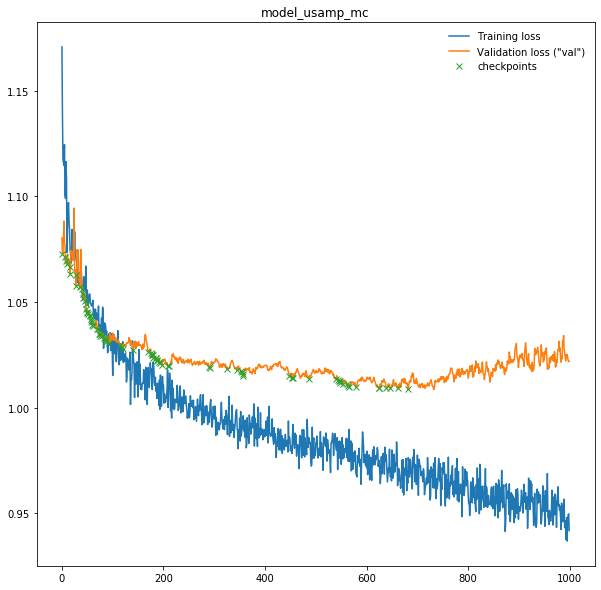


Training model: usamp_reduced_mc

Estimated time needed:	33.97s.	Come back at around:	15/12/2019 20:15
Epoch:(50/1000) 00.03s (5.5%) 	Loss: 1.084861 	VLoss: 1.081	 accuracy: 32.46%
Epoch:(100/1000) 00.03s (11.0%) 	Loss: 1.062655 	VLoss: 1.060	 accuracy: 32.46%
Epoch:(150/1000) 00.03s (17.2%) 	Loss: 1.046402 	VLoss: 1.033	 accuracy: 32.46%
Epoch:(200/1000) 00.03s (21.7%) 	Loss: 1.035439 	VLoss: 1.013	 accuracy: 35.96%
Epoch:(250/1000) 00.03s (26.5%) 	Loss: 1.018098 	VLoss: 1.000	 accuracy: 53.51%
Epoch:(300/1000) 00.03s (32.6%) 	Loss: 1.019449 	VLoss: 0.990	 accuracy: 57.89%
Epoch:(350/1000) 00.03s (38.8%) 	Loss: 1.017543 	VLoss: 0.984	 accuracy: 61.40%
Epoch:(400/1000) 00.03s (44.0%) 	Loss: 1.018797 	VLoss: 0.980	 accuracy: 58.77%
Epoch:(450/1000) 00.03s (49.5%) 	Loss: 0.999704 	VLoss: 0.977	 accuracy: 59.65%
Epoch:(500/1000) 00.03s (47.9%) 	Loss: 1.012313 	VLoss: 0.976	 accuracy: 57.89%
Epoch:(550/1000) 00.04s (55.4%) 	Loss: 1.013503 	VLoss: 0.975	 accuracy: 58.77%
Epoch:(600/1000) 0

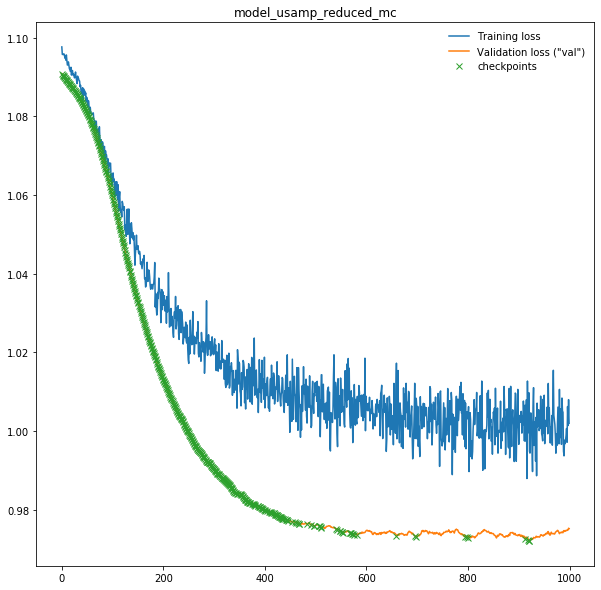


Training model: lda_mc

Estimated time needed:	05m:00011s.	Come back at around:	15/12/2019 20:20
Epoch:(50/1000) 00.23s (5.0%) 	Loss: 0.708585 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(100/1000) 00.21s (10.5%) 	Loss: 0.707070 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(150/1000) 00.23s (14.7%) 	Loss: 0.706714 	VLoss: 0.709	 accuracy: 84.22%
Epoch:(200/1000) 00.22s (19.7%) 	Loss: 0.706599 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(250/1000) 00.23s (24.6%) 	Loss: 0.706555 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(300/1000) 00.23s (29.9%) 	Loss: 0.706579 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(350/1000) 00.22s (34.0%) 	Loss: 0.706517 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(400/1000) 00.24s (39.4%) 	Loss: 0.706483 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(450/1000) 00.21s (47.2%) 	Loss: 0.706448 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(500/1000) 00.20s (52.0%) 	Loss: 0.706444 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(550/1000) 00.22s (56.1%) 	Loss: 0.706435 	VLoss: 0.708	 accuracy: 84.22%
Epoch:(600/1000) 00.23s 

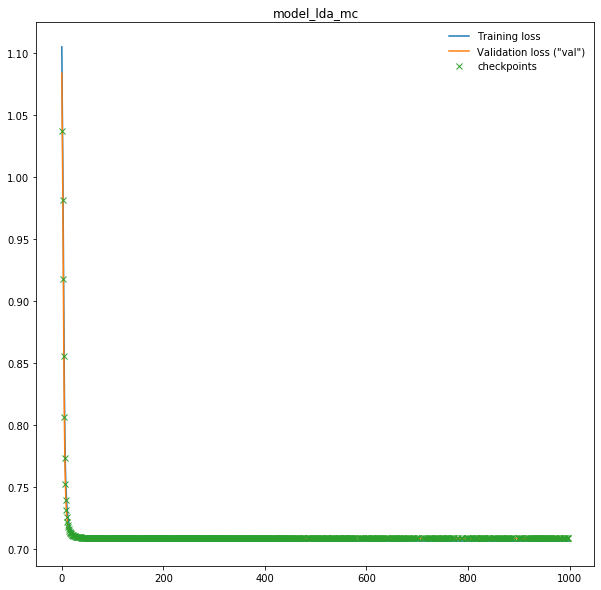


Training model: lda_weighted_mc

Estimated time needed:	04m:00031s.	Come back at around:	15/12/2019 20:23
Epoch:(50/1000) 00.23s (5.0%) 	Loss: 1.010165 	VLoss: 1.051	 accuracy: 69.32%
Epoch:(100/1000) 00.23s (9.8%) 	Loss: 0.988670 	VLoss: 1.034	 accuracy: 70.81%
Epoch:(150/1000) 00.22s (15.5%) 	Loss: 0.980736 	VLoss: 1.028	 accuracy: 69.32%
Epoch:(200/1000) 00.21s (21.3%) 	Loss: 0.985576 	VLoss: 1.026	 accuracy: 69.32%
Epoch:(250/1000) 00.23s (25.5%) 	Loss: 0.978862 	VLoss: 1.024	 accuracy: 68.32%
Epoch:(300/1000) 00.22s (30.4%) 	Loss: 0.980867 	VLoss: 1.022	 accuracy: 68.20%
Epoch:(350/1000) 00.21s (34.8%) 	Loss: 0.977025 	VLoss: 1.021	 accuracy: 68.45%
Epoch:(400/1000) 00.20s (41.6%) 	Loss: 0.973242 	VLoss: 1.019	 accuracy: 67.95%
Epoch:(450/1000) 00.21s (45.6%) 	Loss: 0.979190 	VLoss: 1.019	 accuracy: 67.70%
Epoch:(500/1000) 00.22s (50.8%) 	Loss: 0.978257 	VLoss: 1.018	 accuracy: 67.95%
Epoch:(550/1000) 00.21s (56.7%) 	Loss: 0.969760 	VLoss: 1.019	 accuracy: 68.07%
Epoch:(600/1000)

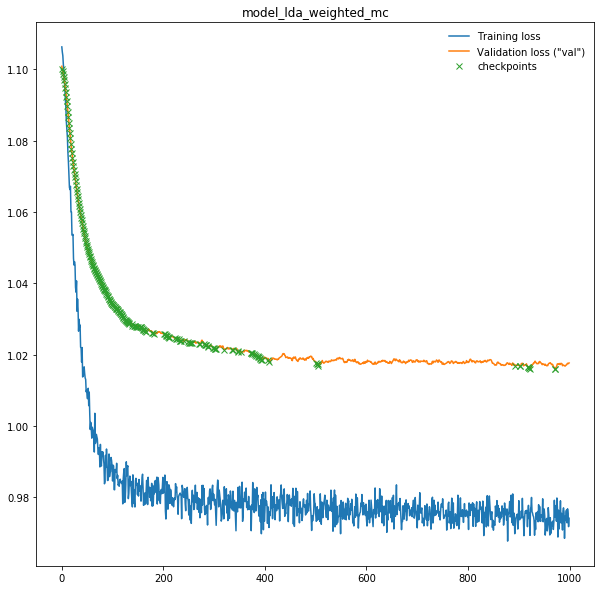


Training model: lda_usamp_mc

Estimated time needed:	34.96s.	Come back at around:	15/12/2019 20:23
Epoch:(50/1000) 00.03s (5.9%) 	Loss: 1.091980 	VLoss: 1.089	 accuracy: 32.46%
Epoch:(100/1000) 00.03s (11.3%) 	Loss: 1.079180 	VLoss: 1.078	 accuracy: 32.46%
Epoch:(150/1000) 00.03s (15.9%) 	Loss: 1.065328 	VLoss: 1.060	 accuracy: 32.46%
Epoch:(200/1000) 00.04s (21.4%) 	Loss: 1.054047 	VLoss: 1.037	 accuracy: 33.33%
Epoch:(250/1000) 00.03s (27.4%) 	Loss: 1.038906 	VLoss: 1.015	 accuracy: 48.25%
Epoch:(300/1000) 00.03s (32.7%) 	Loss: 1.029798 	VLoss: 1.000	 accuracy: 58.77%
Epoch:(350/1000) 00.03s (38.5%) 	Loss: 1.033454 	VLoss: 0.992	 accuracy: 56.14%
Epoch:(400/1000) 00.03s (43.5%) 	Loss: 1.030448 	VLoss: 0.987	 accuracy: 56.14%
Epoch:(450/1000) 00.03s (49.3%) 	Loss: 1.020845 	VLoss: 0.984	 accuracy: 56.14%
Epoch:(500/1000) 00.03s (54.4%) 	Loss: 1.019698 	VLoss: 0.982	 accuracy: 56.14%
Epoch:(550/1000) 00.03s (60.8%) 	Loss: 1.012303 	VLoss: 0.981	 accuracy: 56.14%
Epoch:(600/1000) 00.03

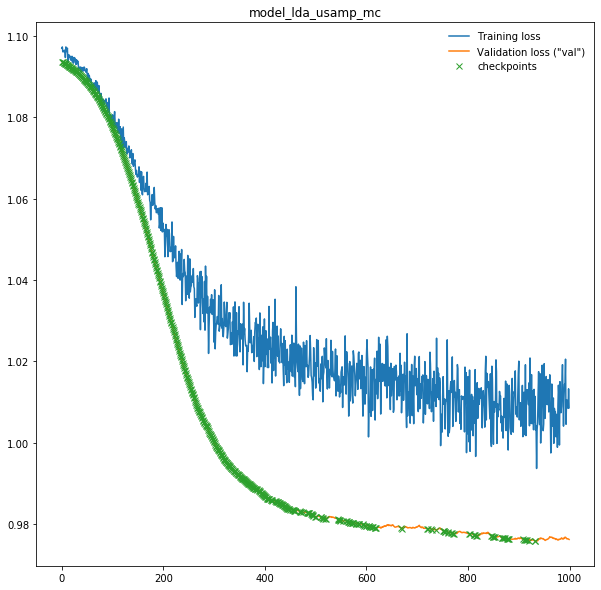

In [30]:
# train all models
for key in models:
    if key == '':
        continue
    
    train(1000, key, load_ckpt=False, print_every=50);

#### Loading the best models

Loading models with the least validation loss (those have been saved automatically during training)

In [33]:
print('loading saved models')

for key in models:
    if key=='':continue
    model = models[key]['model']
    
    
    # load normal models
    try:
        model = model.__class__(model.input_size, n_classes=model.n_classes).to(device)
        model.load_state_dict(torch.load(f'./model_checkpoints/model_{key}_training.pt'))
        models[key]['model'] = model
    except Exception as e:
        print('  !!encountered issue while loading model', key, e)
    
    
    try:
        model_loaded = model.__class__(model.input_size, n_classes=model.n_classes).to(device)
        model_loaded.load_state_dict(torch.load(f'./save/model_{key}.pt'))
        
        models[key]['model_loaded'] = model_loaded
    except Exception as e:
        print('  !!encountered issue while loading model', key, e)
    
    print(f'done loading model "{key}"')

loading saved models
done loading model "bc"
done loading model "weighted_bc"
done loading model "usamp_bc"
done loading model "usamp_reduced_bc"
done loading model "lda_bc"
done loading model "lda_weighted_bc"
done loading model "lda_usamp_bc"
done loading model "mc"
done loading model "weighted_mc"
done loading model "usamp_mc"
done loading model "usamp_reduced_mc"
done loading model "lda_mc"
done loading model "lda_weighted_mc"
done loading model "lda_usamp_mc"


### Run on test set


bc model.


C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


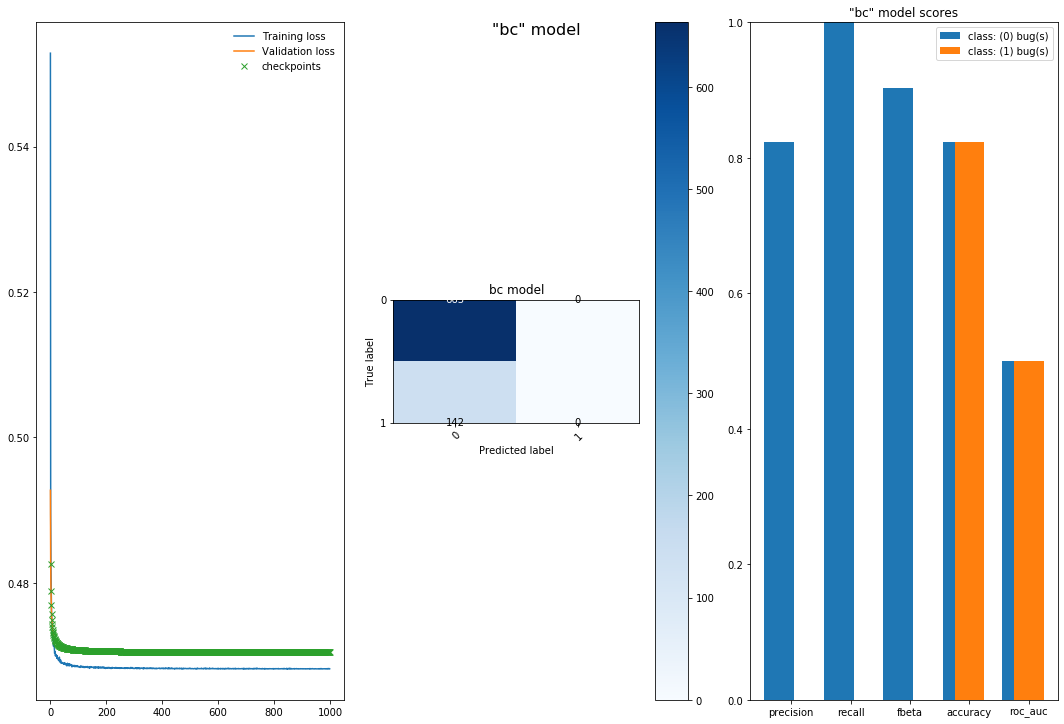

weighted_bc model.


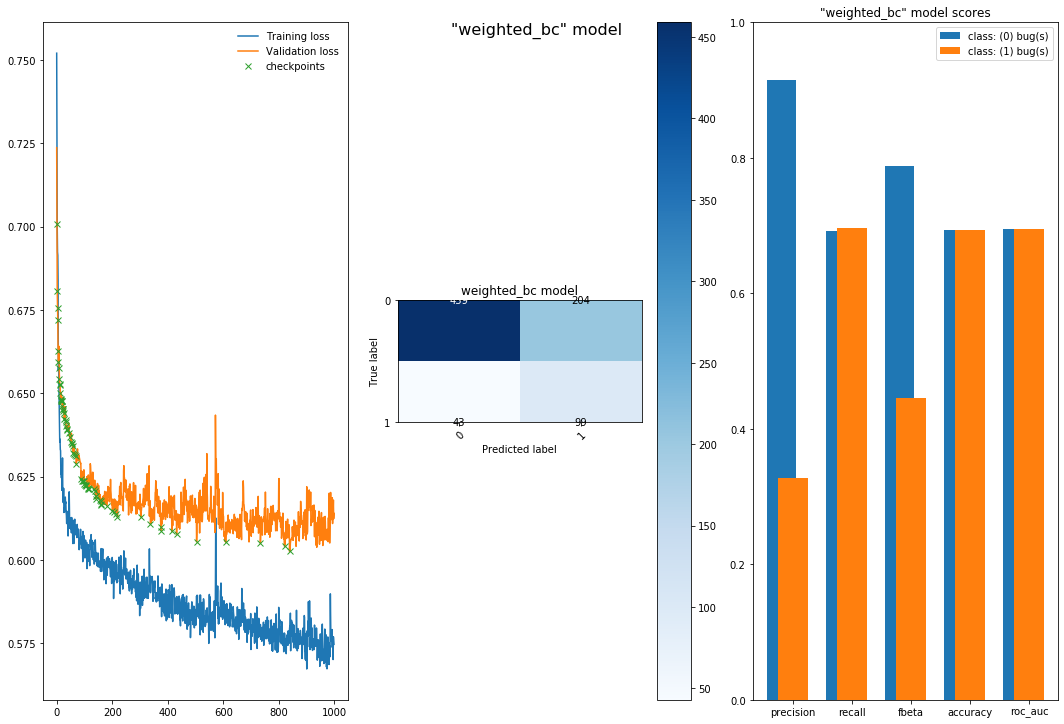

usamp_bc model.


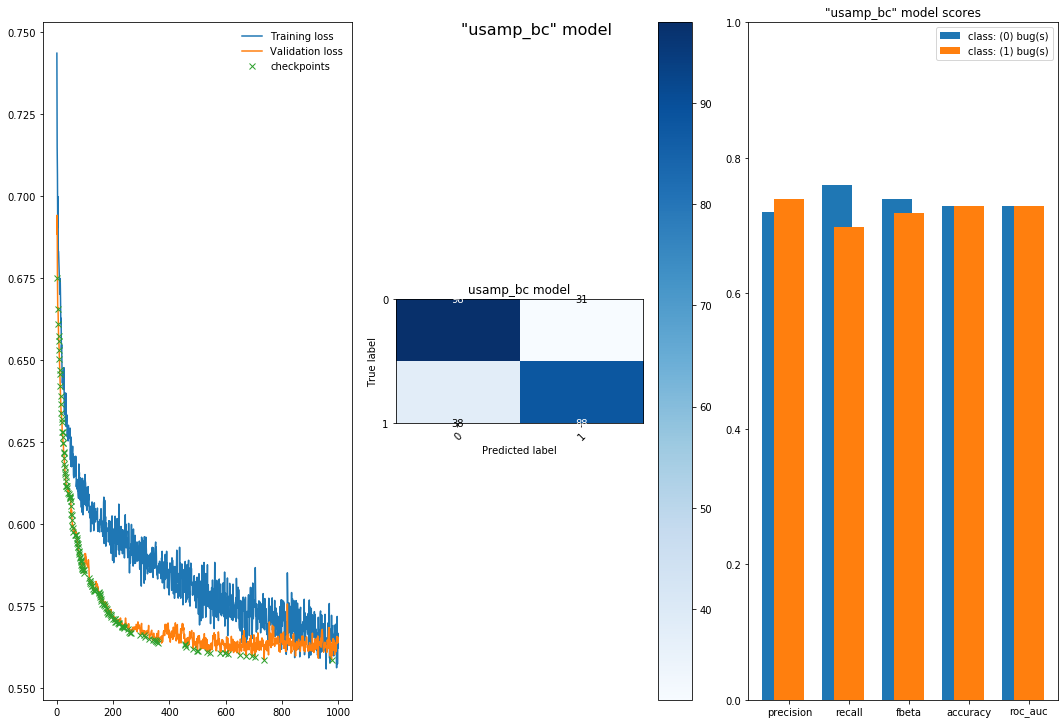

usamp_reduced_bc model.


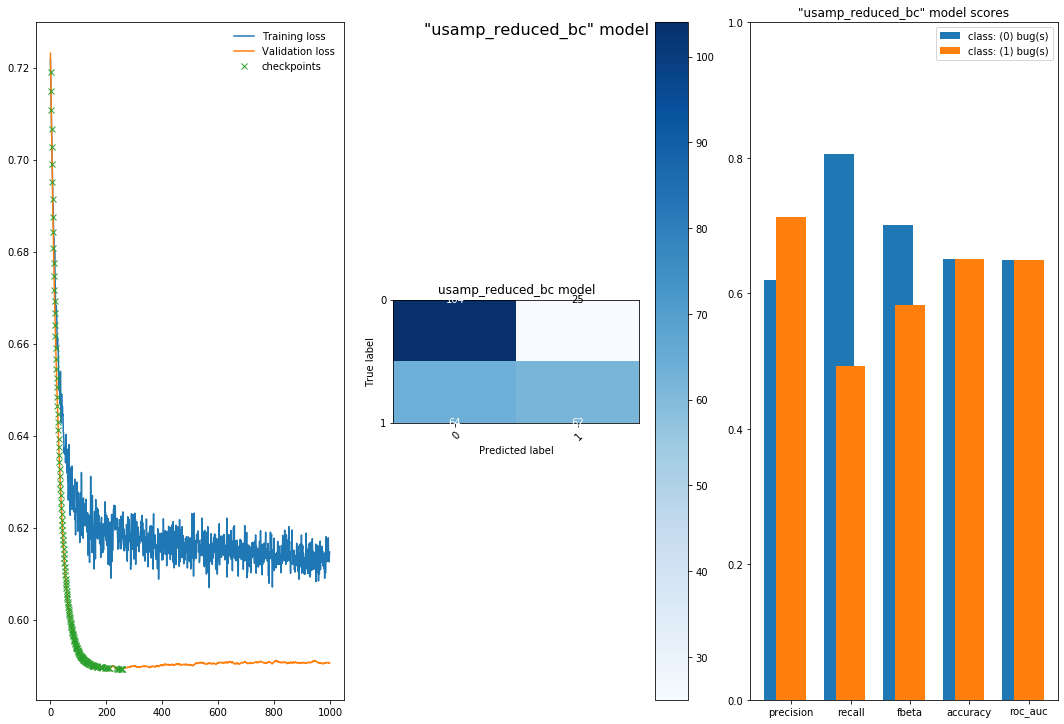

lda_bc model.


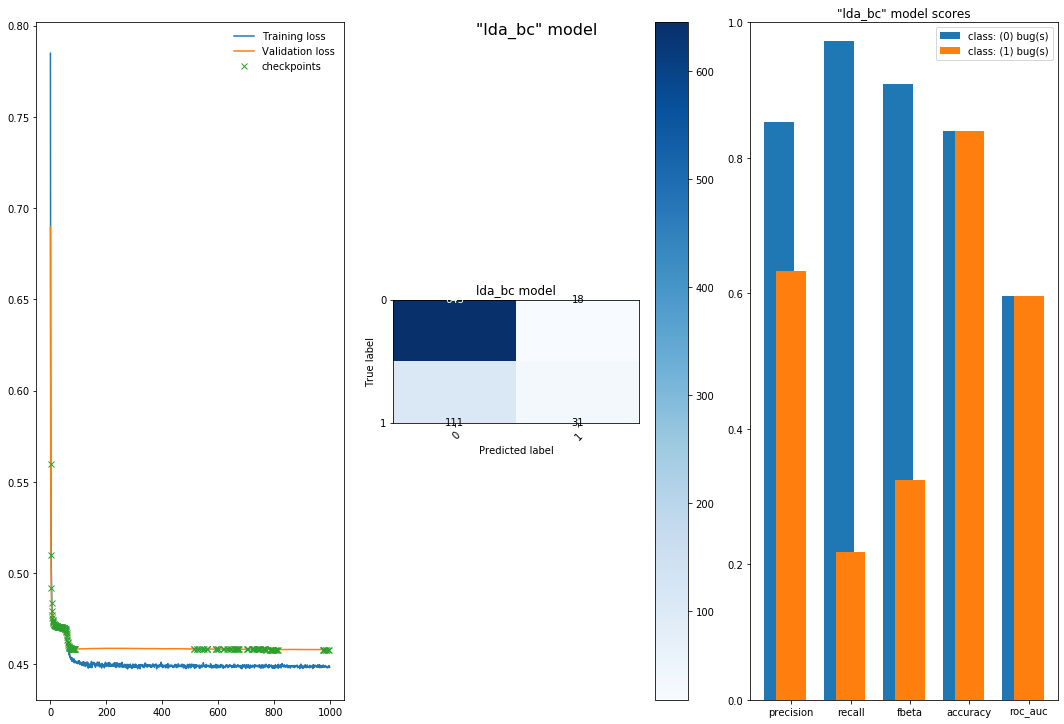

lda_weighted_bc model.


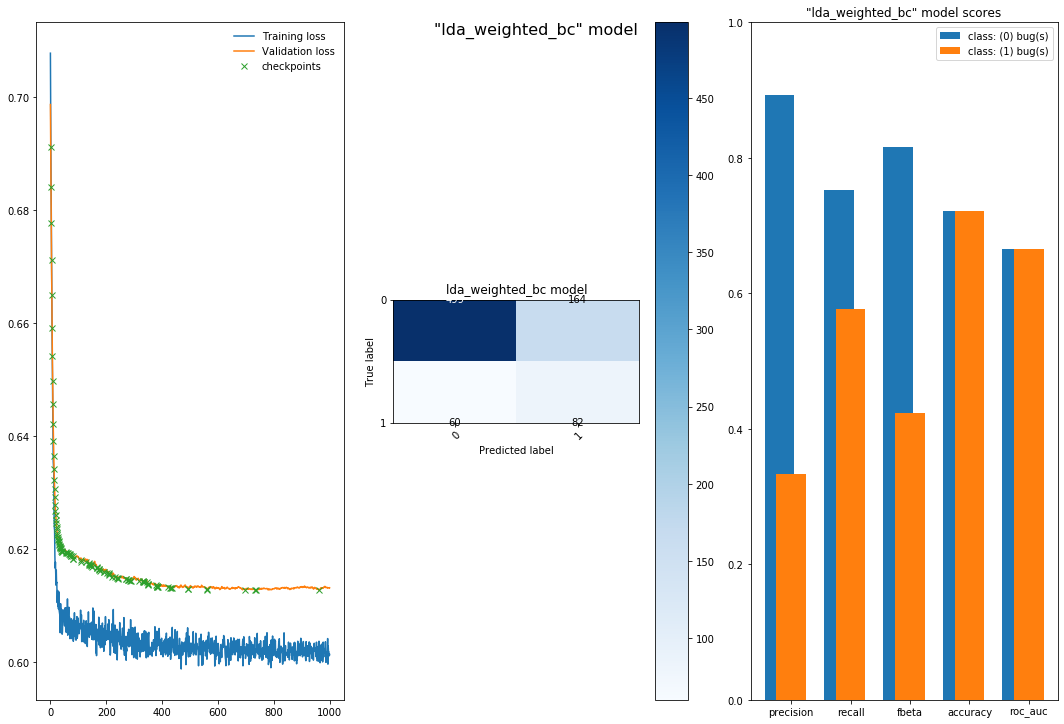

lda_usamp_bc model.


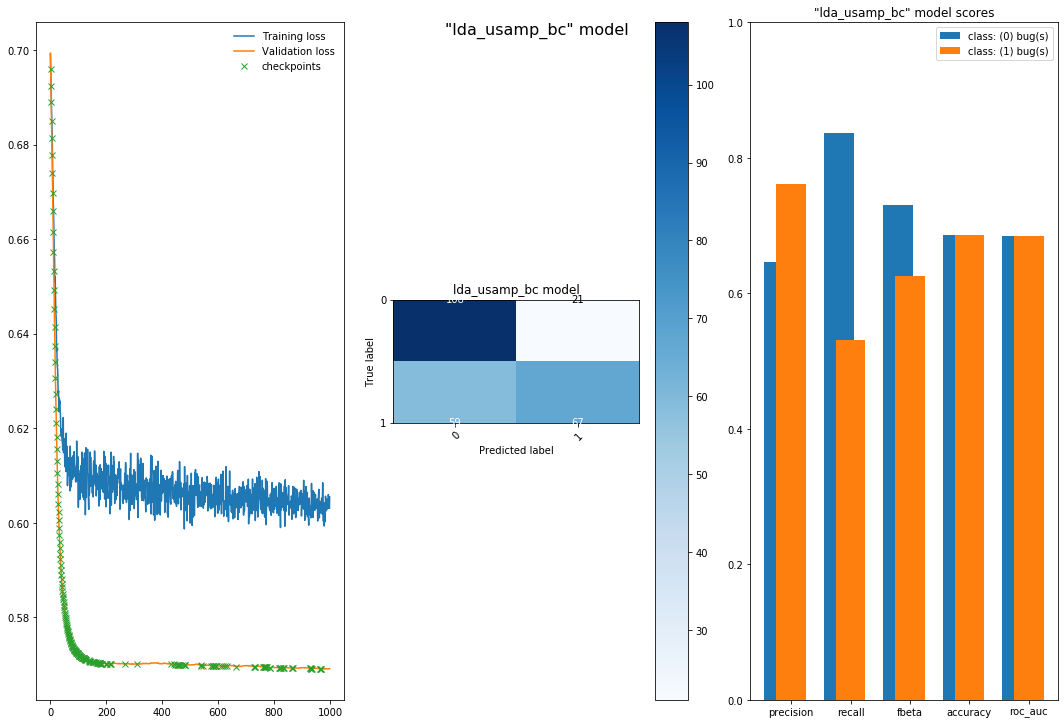

mc model.


C:\Users\faris\Anaconda3\envs\nd101\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


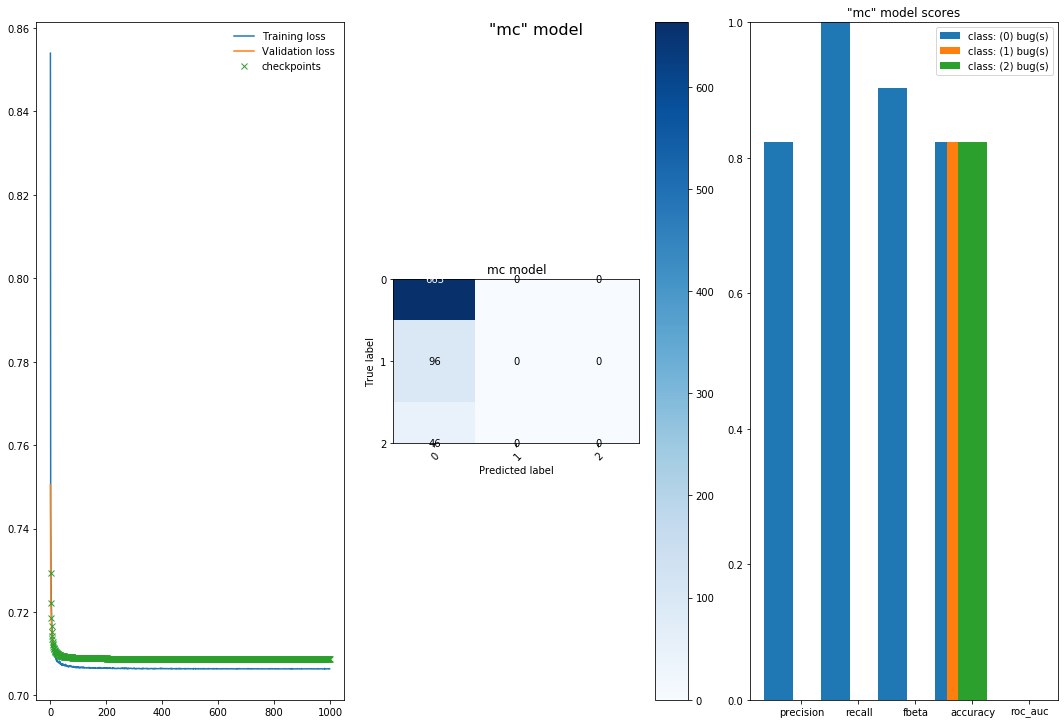

weighted_mc model.


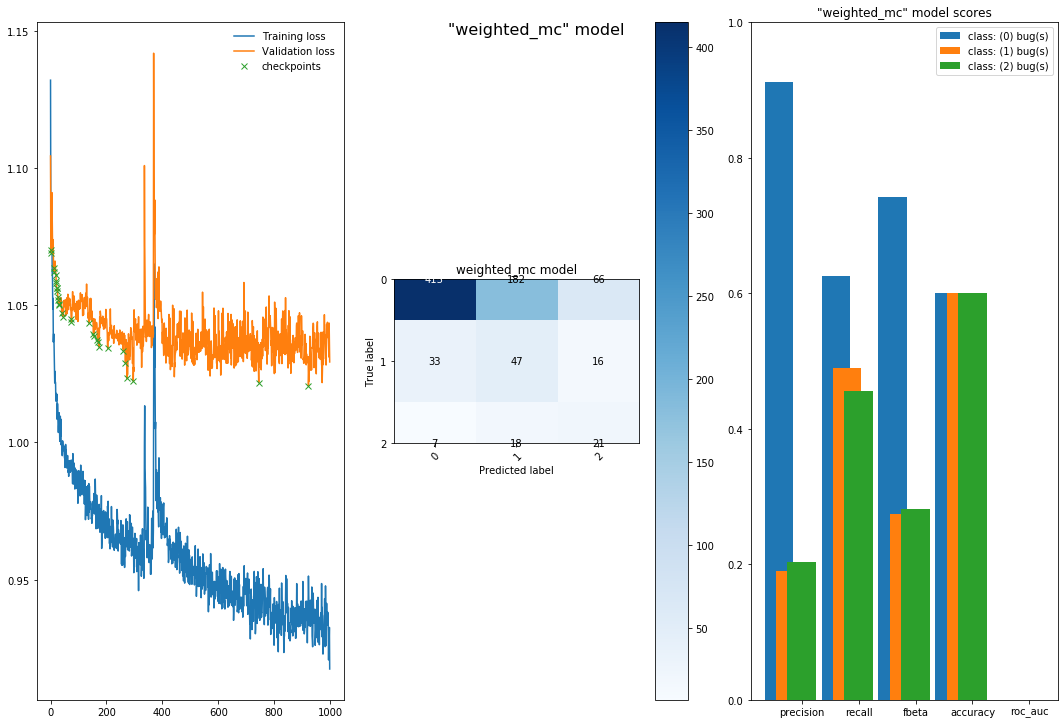

usamp_mc model.


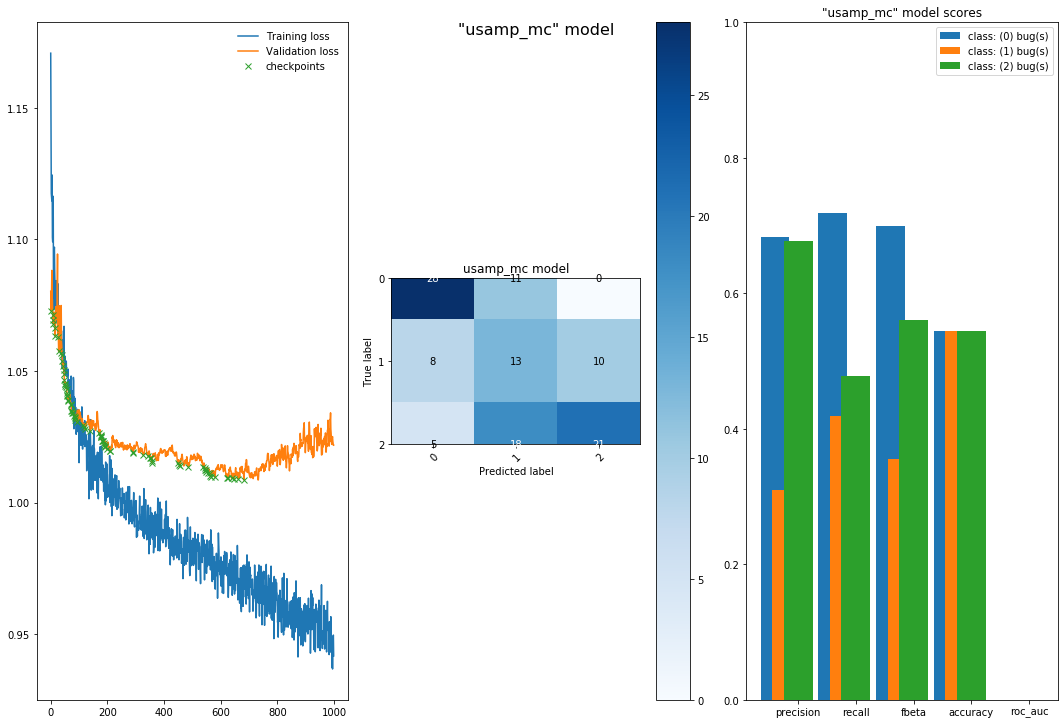

usamp_reduced_mc model.


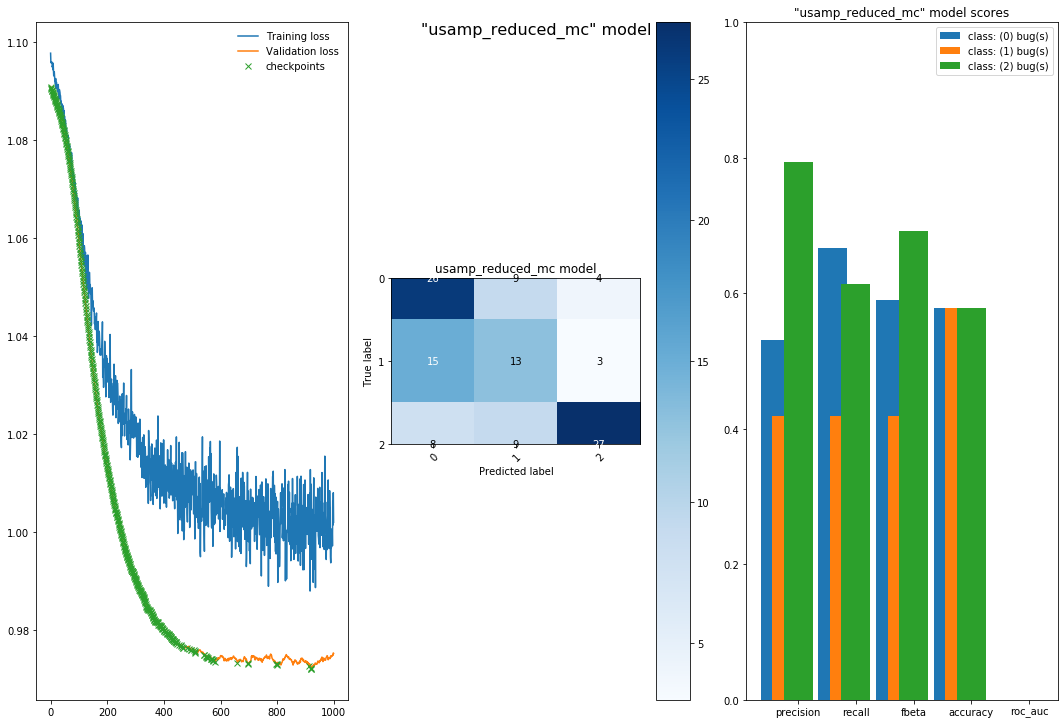

lda_mc model.


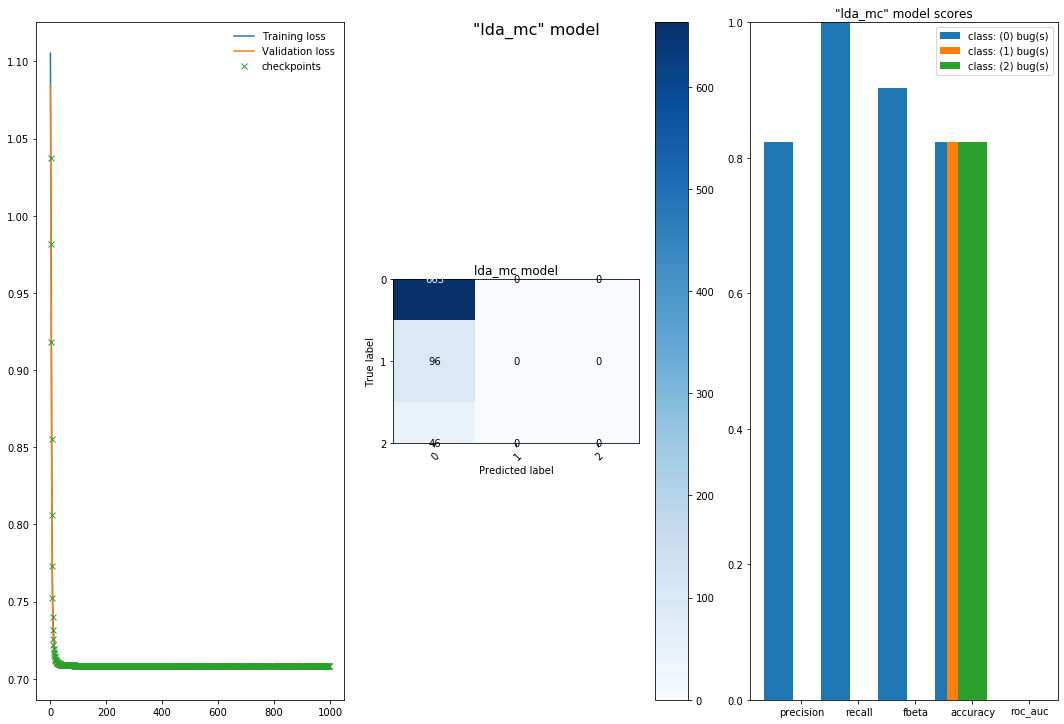

lda_weighted_mc model.


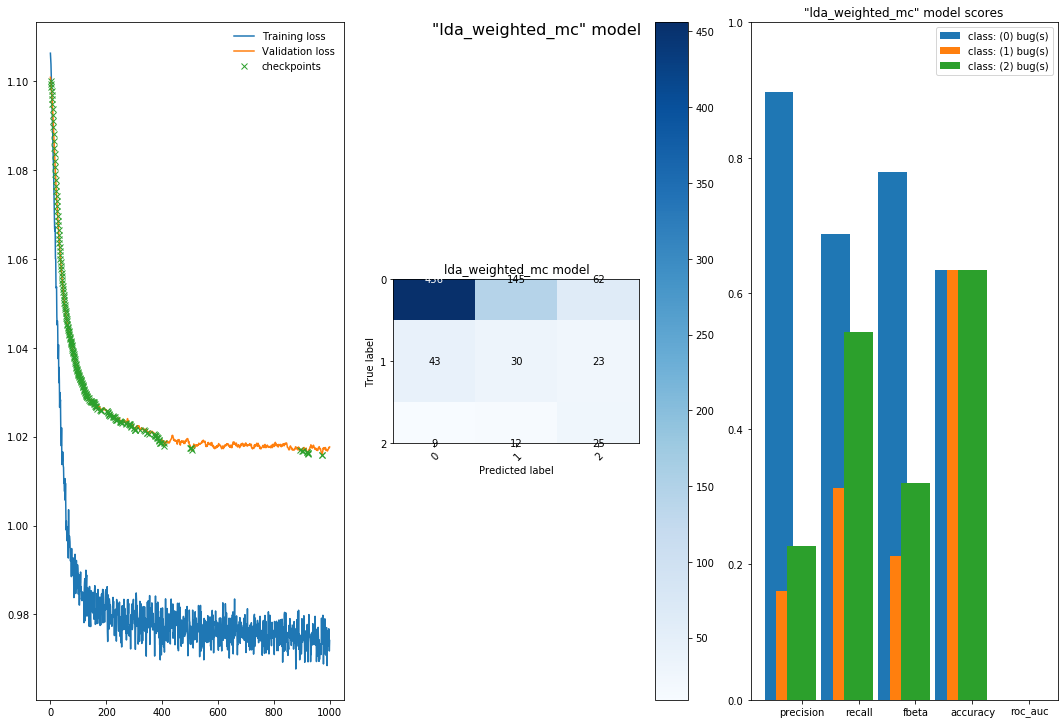

lda_usamp_mc model.


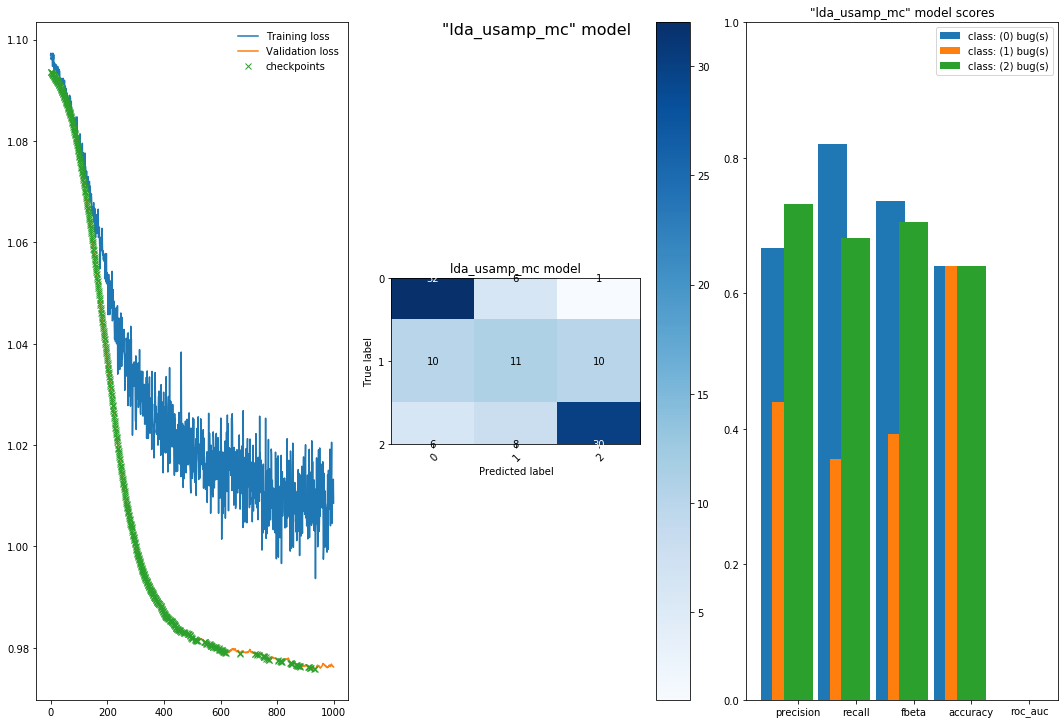

In [82]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from importlib import reload;reload(plot_utils)

def test_model(key, model):
    loader = models[key]['loader']
    criterion = models[key]['criterion']
    classes = models[key]['lda'].classes_

    y_true, y_pred, test_loss = model_utils.test_mc(loader, model, criterion, device=device)

    scores = {}
    scores['precision'], scores['recall'], scores['fbeta'], support =  precision_recall_fscore_support(
        y_true, y_pred, 
        average=None,
        labels=classes
    )
    shape = scores['precision'].shape

#         scores['test_loss'] = np.ones(shape) * test_loss
    scores['accuracy'] = np.ones(shape) * accuracy_score(y_true, y_pred)
    if 'bc' in keywords:
        scores['roc_auc'] = np.ones(shape) * roc_auc_score(y_true, y_pred)
    else:
        scores['roc_auc'] = np.ones(shape) * 0


    fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(15,10))
    
    ## plotting training graph
    stats = models[key]['stats']
    ax3.plot(stats['train_loss'], label='Training loss')
    ax3.plot(stats['valid_loss'], label=f'Validation loss')
    ax3.plot(stats['checkpoints'], 'x', label='checkpoints')
    ax3.legend(frameon=False)
    
    
    ## confusion matrix
    plot_utils.plot_confusion_matrix(
        y_true, y_pred, classes,
        normalize=False,
        title=key+' model',
        fig_ax=(fig, ax1)
    )

    ## plotting scores
    score_names, score_vals = zip(*scores.items())
    score_vals = np.array(score_vals)
    X = np.arange(len(score_names))

    for i in range(score_vals.shape[1]):
        ax2.bar(X+0.2*i, score_vals[:, i], width=0.5, tick_label=score_names, label=f'class: ({i}) bug(s)')
    ax2.set_ylim(0.0, 1.0)
    ax2.set_title(f'"{key}" model scores')
    ax2.legend()
    
    models[key]['scores'] = scores
    
    fig.suptitle(f'"{key}" model', fontsize=16)
    plt.savefig(f"figs/'{key}'-results.png")
    plt.show()



print()

for key in models:
    keywords = key.split('_') # keywords: stuff like ["usamp", "mc", "bc", "reduced"]
    if '' in keywords: continue

    print(f'{key} model.')
    model = models[key]['model']
    model_loaded = models[key]['model_loaded']

#     test_model(key, model)
    test_model(key, model_loaded)
#     print('=============\n\n')


In [88]:
rcolor = lambda: ('#%02X%02X%02X'%(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))) # get random color

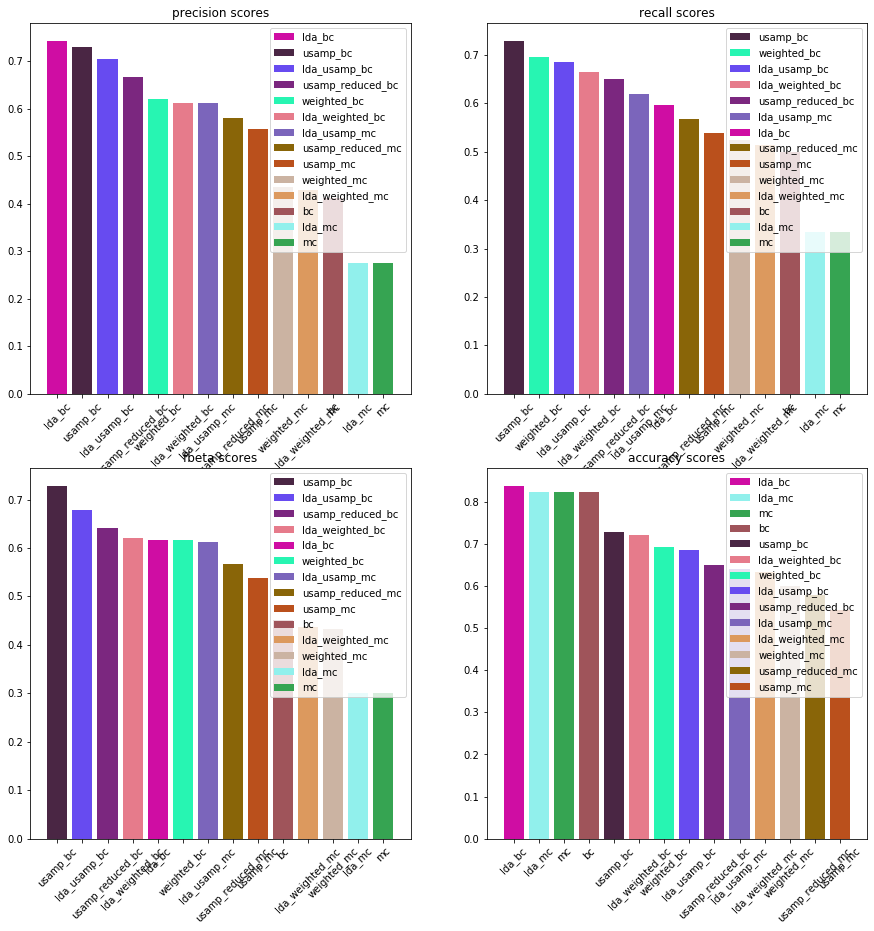

In [139]:
## plotting all scores as comparison

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15,15))
ax = [ax1,ax2,ax3,ax4]

c = {key:rcolor() for key in models} # assign color to each model

for i, score in enumerate(['precision', 'recall', 'fbeta', 'accuracy']):
    for key in reversed(sorted(models.keys(), key=lambda k:models[k]['scores'][score].mean())):
        keywords = key.split('_')

        ax[i].bar(key, models[key]['scores'][score].mean(), label=key, color=c[key])
    ax[i].set_title(f'{score} scores')
    ax[i].legend()
    [tick.set_rotation(45) for tick in ax[i].get_xticklabels()]    # rotating xticks


plt.show()

- majority classifier:
 - Test Loss: 4.861279
 - Test Accuracy: 82% (663/805)